## Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection as ms
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
def fit_predict_cm(X, y):
    model = Perceptron(tol=1e-3, random_state=0)
    model.fit(X, y)

    expected = y
    predicted = model.predict(X)

    cm = confusion_matrix(expected, predicted)
    class_names = ["Não Foi", "Foi"]

    print("coef_", model.coef_)
    print("intercept_", model.intercept_)
    
    df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
    plt.figure(figsize = (3,3))
    sn.heatmap(df_cm, annot=True)

## Definição das bases de treinamento

In [3]:
# ["Clima", "Transporte", "Namorada(o)"]
#              C T N
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

1. Você adora queijo e vá mesmo que seu/ua namorado/a não vá e não exista transporte público próximo. No entanto, se chover fica muito ruim e com certeza não irá.

In [4]:
y1 = np.array([c for c,t,n in X])
y1

array([0, 0, 0, 0, 1, 1, 1, 1])

coef_ [[2. 0. 0.]]
intercept_ [-1.]


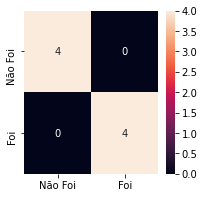

In [5]:
fit_predict_cm(X, y1)

2. Você vai ao festival se o tempo estiver bom OU se seu/ua namorado/a quiser ir E tiver transporte público.

In [6]:
y2 = np.array([c or n and t for c,t,n in X])
y2

array([0, 0, 0, 1, 1, 1, 1, 1])

coef_ [[4. 2. 2.]]
intercept_ [-3.]


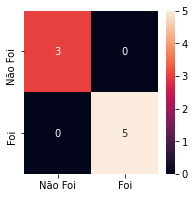

In [7]:
fit_predict_cm(X, y2)